## Observations and Insights
#### Add your analysis here
---

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

%matplotlib notebook
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how= "outer")
# Display the data table for preview
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [75]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [76]:
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [77]:
# Check the number of mice.
mice = mouse_metadata['Mouse ID'].value_counts()
number_of_mice = len(mice)
print(number_of_mice)

249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse_id

array(['g989'], dtype=object)

In [7]:
dup = merge_df["Mouse ID"] == 'g989'

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=merge_df[merge_df["Mouse ID"].isin(dup_mouse_id) == False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Check the number of mice in the clean DataFrame.
mice = clean_data['Mouse ID'].unique() 
number_of_mice = len(mice)
print(number_of_mice)

248


In [11]:
mice
mice_id = pd.DataFrame

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Use this straighforward method, create multiple series and put them all in a dataframe at the end.



In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_drug = merge_df.groupby(['Drug Regimen'])

mean = grouped_drug["Tumor Volume (mm3)"].mean()
mean                               

median = grouped_drug["Tumor Volume (mm3)"].median()
median

var = grouped_drug["Tumor Volume (mm3)"].var()

std = grouped_drug["Tumor Volume (mm3)"].std()

sem = grouped_drug["Tumor Volume (mm3)"].sem()

# Use method to produce everything with a single groupby function

sum = pd.DataFrame({"mean": mean, "median": median, "var": var, "std": std, "sem": sem})
sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<IPython.core.display.Javascript object>


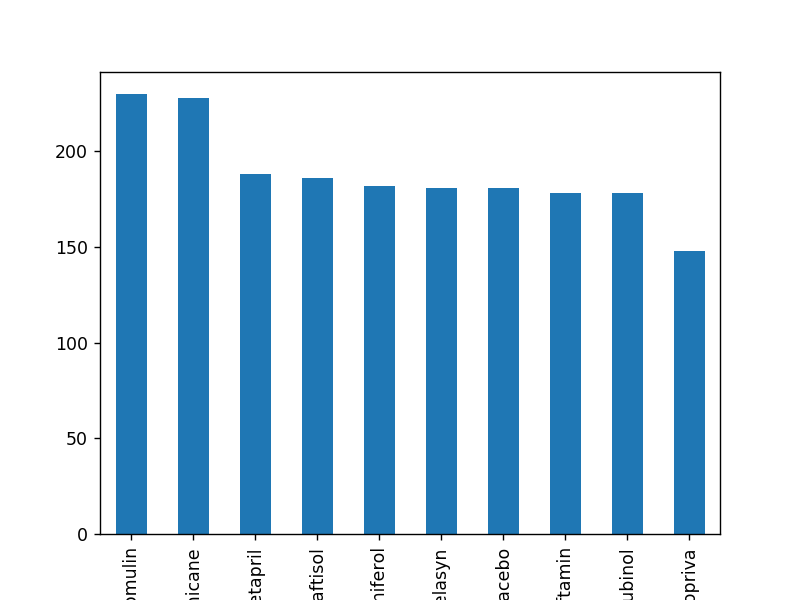

In [14]:
clean_data['Drug Regimen'].value_counts().plot(kind='bar')

<IPython.core.display.Javascript object>


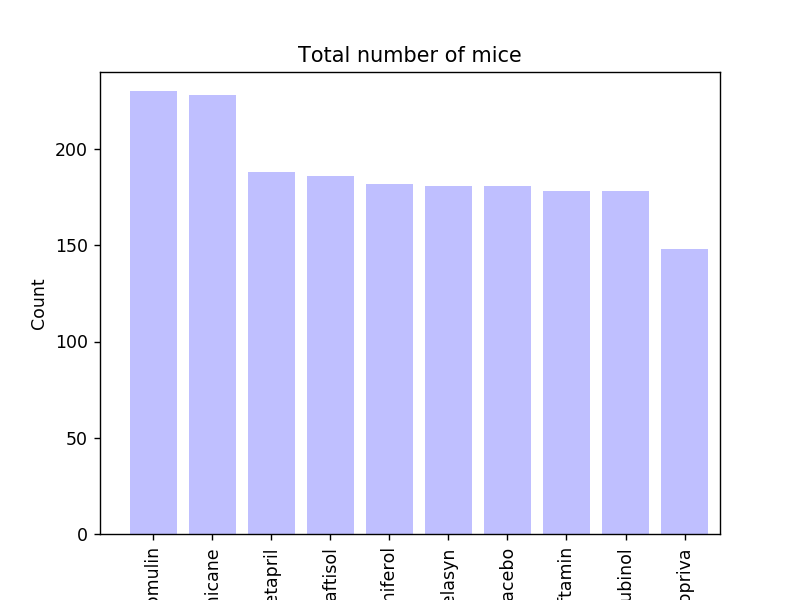

Text(0, 0.5, 'Count')

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment = clean_data["Drug Regimen"].value_counts()

# Set x axis and tick locations
x_axis = np.arange(len(treatment))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(2)
plt.bar(x_axis, treatment, color='b', alpha=0.25, align="edge")
plt.xticks(tick_locations, treatment.index, rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(treatment)+10)

plt.title("Total number of mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

list = {"Sex": ["Male", "Female"], "Percentage": [0.45, 0.55]}
df = pd.DataFrame(list)

#df
#plot = df.plot.pie(y='Percentage',figsize=(5,5))

Sex = clean_data.groupby(['Sex'])
Sex['Sex'].value_counts()

Sex     Sex   
Female  Female    922
Male    Male      958
Name: Sex, dtype: int64

In [17]:
only_male = clean_data.loc[clean_data["Sex"]== "Male", :]
male = only_male["Mouse ID"].unique()
total_male = len(male)
per_male = total_male*100/number_of_mice

only_female = clean_data.loc[clean_data["Sex"]== "Female", :]
female = only_female["Mouse ID"].unique()
total_female = len(female)
per_female = total_female*100/number_of_mice


#gender_sum = ([[total_male, total_female, total_other], [per_male, per_female, per_other], index=["Female","Male", "Other / Non-Disclosed"], columns=["Percentage of Players", "Total Count"])
gender_df = pd.DataFrame([[total_female, per_female], [total_male, per_male]], index=["Female","Male"], columns=["Total Count","Percentage of Mouse"])
gender_df

,Total Count,Percentage of Mouse
Female,123,49.596774
Male,125,50.403226


<IPython.core.display.Javascript object>


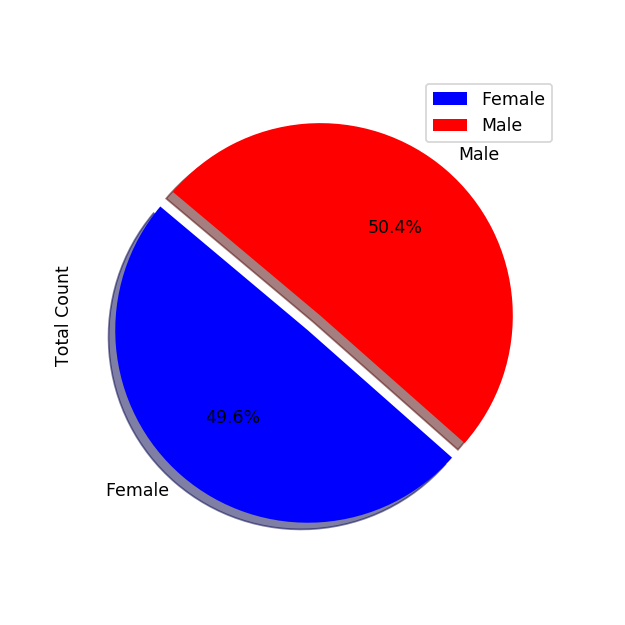

In [34]:
colors = ['blue', 'red']
explode = (0.1, 0)
plot = gender_df.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

<IPython.core.display.Javascript object>


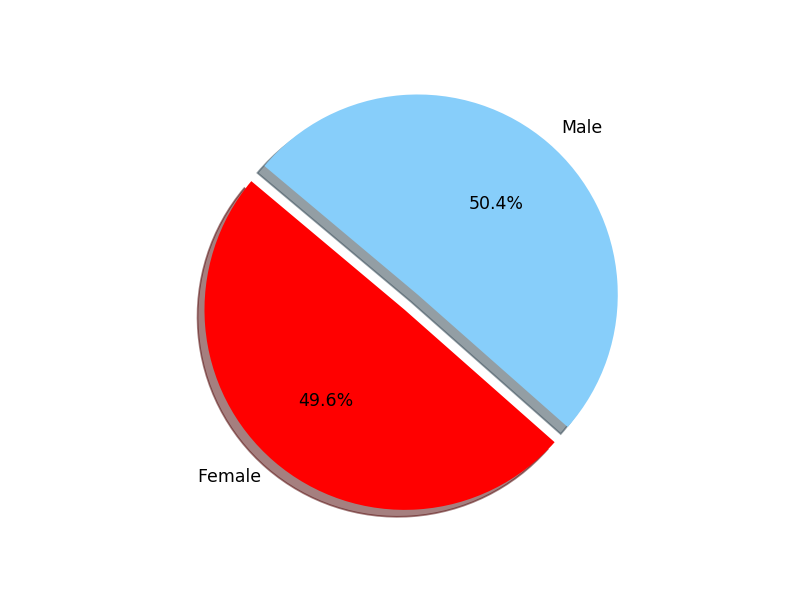

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [49.6, 50.4]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.figure(4)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [64]:
#a203 = clean_data.loc[clean_data['Mouse ID'] == "a203", :]
#a203

In [96]:
mouse_id = clean_data.groupby("Mouse ID")
mouse_id.head()
max_timepoint = mouse_id["Timepoint"].max()
max_timepoint
#df_1 = clean_data.loc[clean_data["Tumor Volume (mm3)"] = max_timepoint, :]
#df_1

df_1 = pd.DataFrame({"Timepoint": max_timepoint})
df_1

df_1 = df_1.reset_index()
df_1

#merge_1 =  pd.merge(df_1, clean_data, on="Mouse ID", how= "left")
#merge_1

df = clean_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
df

,Mouse ID,Timepoint,Tumor Volume (mm3)
0,k403,0,45.000000
1,k403,5,38.825898
2,k403,10,35.014271
3,k403,15,34.223992
4,k403,20,32.997729
...,...,...,...
1888,z969,25,63.145652
1889,z969,30,65.841013
1890,z969,35,69.176246
1891,z969,40,70.314904


In [98]:
mouse_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [14]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset to tumor volume data list
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


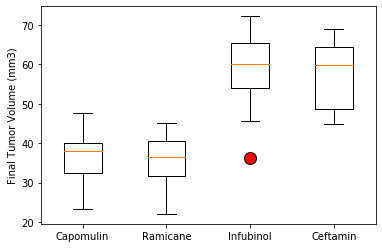

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

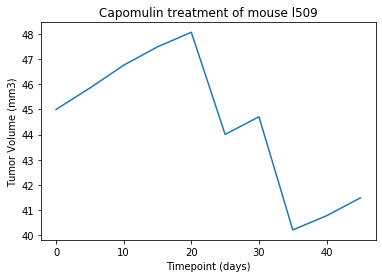

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


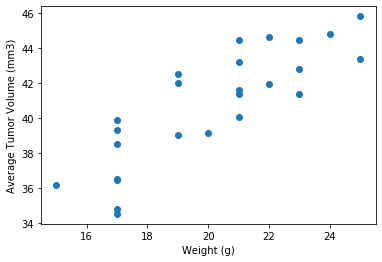

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


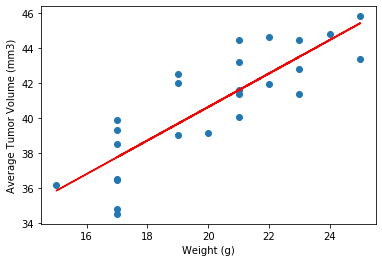

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
